In [1]:
import pickle
x_dev, y_dev = None, None
with open('train.pickle', 'rb') as file:
    x_dev, y_dev = pickle.load(file)

X_test, Y_test = None, None
with open('test.pickle', 'rb') as file:
    X_test, Y_test = pickle.load(file)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_curve, roc_auc_score

In [3]:
import numpy as np

X_train, X_val, Y_train, Y_val = train_test_split(x_dev,y_dev, test_size=0.2, random_state=0)

label = {'Fully Paid' : 0, 'Charged Off' : 1}


Y_train = Y_train.apply(lambda x: label[x]).values
Y_test = Y_test.apply(lambda x: label[x]).values
Y_val = Y_val.apply(lambda x : label[x]).values

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test


**SVM**

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
primal = LinearSVC()
primal.fit(X_train, Y_train)

# Make predictions on the training, validation, and test sets
train_acc = accuracy_score( Y_train,primal.predict(X_train))
val_acc = accuracy_score(Y_val,primal.predict(X_val))
test_acc = accuracy_score(Y_test,primal.predict(X_test))

# Report the accuracy on the training, validation, and test sets
print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)
print('Test accuracy:', test_acc)

Training accuracy: 0.8058168508073862
Validation accuracy: 0.8052615313296763
Test accuracy: 0.8069679849340866


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

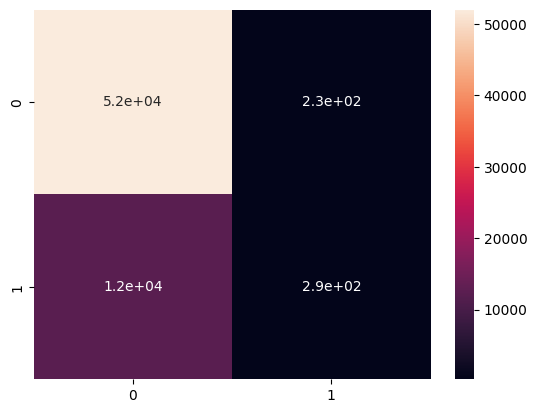

In [6]:

import seaborn as sns
y_pred_test=primal.predict(X_test)
cf_matrix=confusion_matrix(Y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

SMOTE, Oversampling and undersamping

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


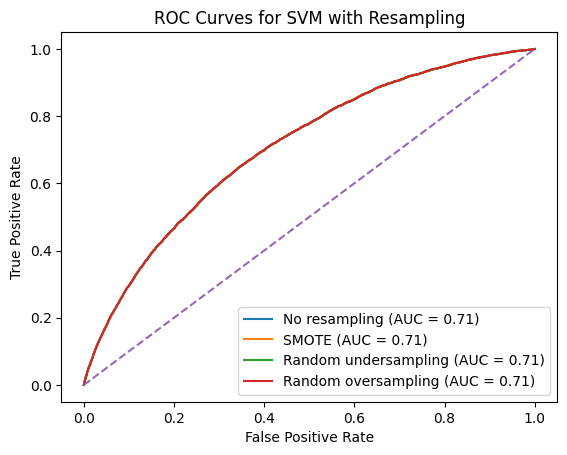

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
X_train_over,  y_train_over = ros.fit_resample(X_train, Y_train)


smote = SMOTE()
under = RandomUnderSampler()
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)
X_train_under, y_train_under = under.fit_resample(X_train, Y_train)

# train logistic regression models on each resampled dataset
model_no_resampling = primal.fit(X_train, Y_train)
model_smote = primal.fit(X_train_smote, y_train_smote)
model_under = primal.fit(X_train_under, y_train_under)
model_over = primal.fit(X_train_over, y_train_over)

# predict probabilities on test set
y_prob_no_resampling = model_no_resampling._predict_proba_lr(X_test)[:, 1]
y_prob_smote = model_smote._predict_proba_lr(X_test)[:, 1]
y_prob_under = model_under._predict_proba_lr(X_test)[:, 1]
y_prob_over = model_over._predict_proba_lr(X_test)[:, 1]

# calculate false positive rate and true positive rate for ROC curves
fpr_no_resampling, tpr_no_resampling, _ = roc_curve(Y_test, y_prob_no_resampling)
fpr_smote, tpr_smote, _ = roc_curve(Y_test, y_prob_smote)
fpr_under, tpr_under, _ = roc_curve(Y_test, y_prob_under)
fpr_over, tpr_over, _ = roc_curve(Y_test, y_prob_over)

# calculate ROC AUC scores
auc_no_resampling = roc_auc_score(Y_test, y_prob_no_resampling)
auc_smote = roc_auc_score(Y_test, y_prob_smote)
auc_under = roc_auc_score(Y_test, y_prob_under)
auc_over = roc_auc_score(Y_test, y_prob_over)

# plot ROC curves
plt.plot(fpr_no_resampling, tpr_no_resampling, label='No resampling (AUC = %0.2f)' % auc_no_resampling)
plt.plot(fpr_smote, tpr_smote, label='SMOTE (AUC = %0.2f)' % auc_smote)
plt.plot(fpr_under, tpr_under, label='Random undersampling (AUC = %0.2f)' % auc_under)
plt.plot(fpr_over, tpr_over, label='Random oversampling (AUC = %0.2f)' % auc_over)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM with Resampling')
plt.legend(loc='lower right')
plt.show()
